## Sensitivity test basin refilling : Added background potential energy (BPE) by inflow

Same concepts used in previous BPE calculations are used here.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import math

## Upload data files here

Rise of the basin levels exported from refilling model is used to calculate the daily addition of BPE by flood discharge.

In [2]:
SLrise_ST = np.loadtxt(fname="SensitivityTest_SL_rise_wMed.txt")       # Daily sea-level rise
Hypsometrywmed = np.loadtxt(fname="Hypsometry_Stage3_Refilling.txt")

## Setting parameters

In [3]:
rho_SW  = 1027 # Sea-water density [kg m^-3]
g       = 9.81 # Acceleration due to gravity [m s^-2]
SL      = SLrise_ST.tolist()
SLarray = (Hypsometrywmed[:,0])          # Text file column 1 gives basin depth
Area    = (Hypsometrywmed[:,1])*10**12    # Text file column 2 gives area with depth

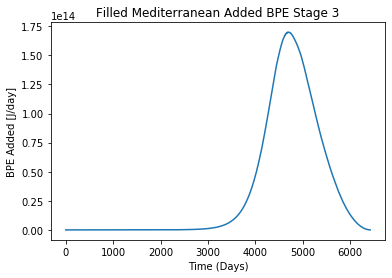

In [5]:
SL1 = SL[0]  # Present-day sea-level
SL2 = SL[1]  # Next day sea-level
BPE_sum = [] # Array to store total BPE for plotting
t = 1        # Starting time
time=[]      # Array to store time [days]

while SL1>0:
    
    
    SL1=SL[SL.index(SL1)+1]
    if SL1 == SL[-1]:
        break
        
    SL2=SL[SL.index(SL2)+1]

    
    #print (SL1, SL2)
    
    # Arrays used for calculations, see below
    y=[]
    y0 = []
    yi = []
    p=[]
    y00 = []
    yii = []
    Product_VolumeHt = []  # product of cell volume and head difference
    
    SLEarly = math.trunc(SL1)
    SLLate = math.trunc(SL2)+1
    SLLate2 = math.trunc(SL2)
    SLGap1 = SL1-SLEarly
    SLGap2 = SLLate-SL2
    
    #print (SLEarly,SLLate,SLLate2, SLGap1, SLGap2)
    
    for i,j in zip(SLarray,Area):
        
        if i<SL1 and i>SL2:
            
            y.append(i)
            p.append(j)
            #print (j)
            
            for ii,jj in zip(y,p):
                
                product = (SL1-ii+0.5)*jj  
                
            Product_VolumeHt.append(product) 
            
    BPEInBetween = np.sum(Product_VolumeHt)*g*rho_SW
    

    
    for i0,j0 in zip(SLarray,Area):
        
        if i0 == (SLEarly+1):
            
            y0.append(i0)
            y00.append(j0)
         
        #CASE 1
        BPEBot_case1 = np.array(y00)*rho_SW*0.5*g*(SLGap1)**2
        # CASE 2 where SLLate = SLEarly
        BPEBot_case2 = np.array(y00)*rho_SW*0.5*g*((SLGap1)**2)
        
    for ii,ji in zip(SLarray,Area):
        
        if ii == SLLate:
            
            yi.append(ii)
            yii.append(ji)
            
        #Case 1
        BPETop_case1 = np.array(yii)*rho_SW*g*0.5*((2*(SL1-SL2)*(SL2-SLLate2))+(SL2-SLLate2)**2)
        #Case2 
        BPETop_case2 = np.array(yii)*rho_SW*g*0.5*((2*SLGap1*SLGap2)+SLGap2**2)

    if SLEarly-SLLate2>1:    # CASE 1 (Sealevel rise across several layers)
        BPETotal = BPEInBetween+BPEBot_case1-BPETop_case1 
        
    if SLEarly-SLLate2 ==1:  # CASE 2 (Sealevel rise across 2 consecutive layers)
        
        BPETotal = BPEBot_case2+BPETop_case2
        
    if SLEarly==SLLate2:     # CASE 3 (Sealevel rise within a layer of 1 m)
        
        BPETotal = ((1-SLGap1-SLGap2)**2)*rho_SW*g*0.5*np.array(yii) #- Sign doen's matter as squared is positive

        
    #print (BPETotal)
        
    BPE_sum.append(BPETotal)
    time.append(t)
    t=t+1       
    #print(y00, BPEBot_case1, SLGap1, SLGap2, SLEarly, SLLate, BPETop_case1)
    #print(yii)
    #print(y)
    #print(p)
    #print(Product_VolumeHt)
    #print(BPEInBetween, t)
    #print(BPE_sum)

    
plt.figure()
plt.title('Filled Mediterranean Added BPE Stage 3')
plt.ylabel('BPE Added [J/day]')
plt.xlabel('Time (Days)')
plt.plot(time,BPE_sum)

np.savetxt("ST_Added_BPE.txt", np.array(BPE_sum), fmt="%s")
    